# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

pulledCities = [];   country = []
lat = [];            lon = []
temp = [];           humidity = []
cloudiness = [];     windSpeed = []


for city in cities:
    response = requests.get(query_url + city).json()
    try:
        pulledCities.append(response['name'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append((response['sys']['country']))
    except (KeyError, IndexError):
        pass
    print(len(pulledCities))
    

1
2
3
3
4
5
6
7
8
9
9
10
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
24
25
26
27
28
29
30
31
32
33
34
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
50
50
51
52
53
54
55
56
57
57
58
59
60
61
62
63
64
65
66
67
68
68
69
69
70
71
72
73
74
75
76
76
77
78
79
80
81
82
83
84
84
85
86
86
87
88
89
90
91
91
92
93
94
95
96
97
98
99
100
101
102
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
124
125
126
126
127
128
129
130
131
132
133
134
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
175
176
177
178
179
180
180
181
182
183
184
185
186
187
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_df = pd.DataFrame({
    "City":pulledCities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)":temp,
    "Humidity (%)":humidity,
    "Cloudiness (%)":cloudiness,
    "Wind Speed (mph)": windSpeed
})
weather_df.head()

weather_df.to_csv(output_data_file, index=False, header=True)


In [26]:
weather_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Vostok,RU,46.49,135.88,53.29,96,0,1.88
1,Port Hedland,AU,-20.32,118.57,64.40,77,51,5.82
2,Albany,US,42.60,-73.97,73.47,85,74,5.66
3,Atuona,PF,-9.80,-139.03,79.99,73,40,18.21
4,Tuatapere,NZ,-46.13,167.68,39.00,83,77,3.00
...,...,...,...,...,...,...,...,...
579,Fuling,CN,29.70,107.39,73.45,92,100,2.59
580,Waspán,NI,14.74,-83.97,87.80,70,75,8.05
581,Vestmannaeyjar,IS,63.44,-20.27,53.60,81,20,16.11
582,Zhangjiakou,CN,40.81,114.88,67.84,71,44,4.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [27]:
def Scatter_Lattitude(weather_df, para_1, para_2):
    plt.scatter(weather_df[para_1],weather_df[para_2])
    plt.title('Latitude vs.' + para_2)
    plt.xlabel(para_1,fontsize=12);
    plt.ylabel(para_2,fontsize=12);
    plt.tight_layout();
    lat_output_plot = '../output_data/'+para_1+'_'+para_2 +'.png'
    plt.savefig(lat_output_plot, dpi=300,bbox_inches='tight')

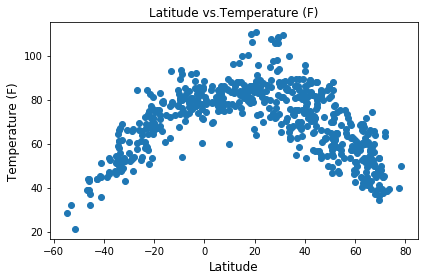

In [28]:
para_1 = "Latitude"
para_2 = 'Temperature (F)'
Scatter_Lattitude(weather_df, para_1, para_2)

#### Latitude vs. Humidity Plot

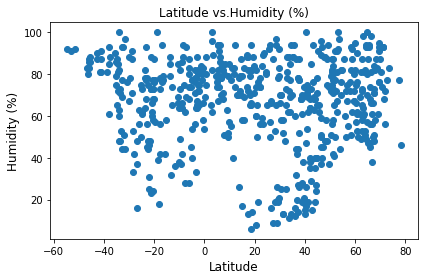

In [29]:
para_1 = "Latitude"
para_2 = 'Humidity (%)'
Scatter_Lattitude(weather_df, para_1, para_2)

#### Latitude vs. Cloudiness Plot

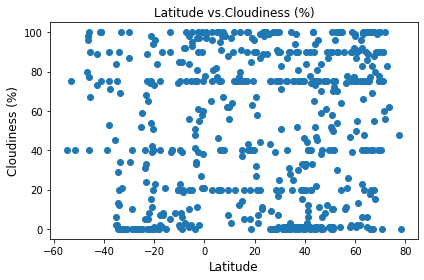

In [30]:
para_1 = "Latitude"
para_2 = 'Cloudiness (%)'
Scatter_Lattitude(weather_df, para_1, para_2)

#### Latitude vs. Wind Speed Plot

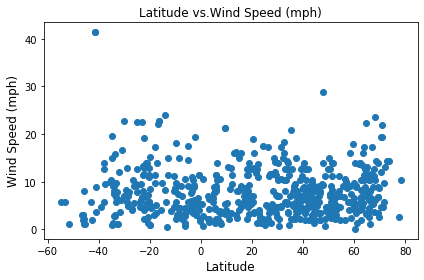

In [31]:
para_1 = "Latitude"
para_2 = 'Wind Speed (mph)'
Scatter_Lattitude(weather_df, para_1, para_2)

## Linear Regression

In [32]:
# Create Northern and Southern Hemisphere DataFrames
df_north = weather_df[weather_df['Latitude'] > 0]
df_south = weather_df[weather_df['Latitude'] < 0]

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
def scatter_regress(weather_df, para_1, para_2):

    fig = plt.figure(figsize=(7,4))
    plt.scatter(weather_df[para_1],weather_df[para_2], marker=None, color='C0', 
            linewidths=0.3, edgecolors="black")
    plt.title("Latitude vs. " + para_2)
    plt.xlabel(para_1)
    plt.ylabel(para_2)
    plt.grid()
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df[para_1],weather_df[para_2])
    regress_values = weather_df[para_1] * slope + intercept
    plt.plot(weather_df[para_1],regress_values,"r-")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    text =(line_eq + ', R$^{2}$ = ' + str(round(rvalue,2)))
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.8, edgecolor='none')        
    fig.text(0.15,0.17, text, size=12,bbox=props,fontsize=14,color ='red')
    
    output_plot = '../output_data/'+para_1+'_'+para_2 + "_regression" +'.png'
    plt.savefig(output_plot, dpi=300,bbox_inches='tight')


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

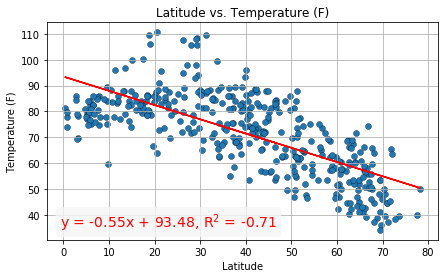

In [34]:
para_1 = "Latitude"
para_2 = 'Temperature (F)'
scatter_regress(df_north, para_1, para_2)
# Looking at the chart there is a clear corrilation of lattitude and tempaerature. 
# This should make sesnse as we get closer to the equator, the temperature rises.
# The same is true for the southern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

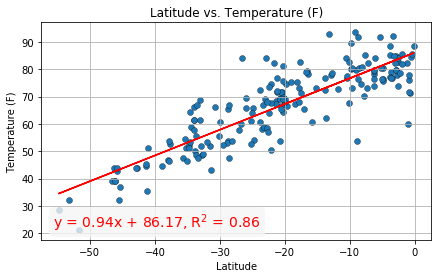

In [35]:
para_1 = "Latitude"
para_2 = 'Temperature (F)'
scatter_regress(df_south, para_1, para_2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

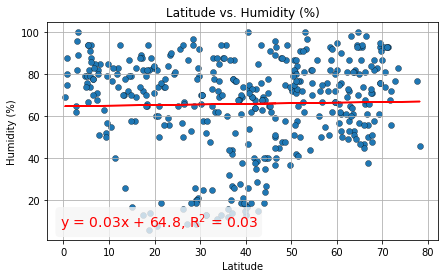

In [36]:
para_1 = "Latitude"
para_2 = 'Humidity (%)'
scatter_regress(df_north, para_1, para_2)
# As for humidiity, there is a grouping of lower humidity towards the equator. 
# This is probably due to heat, drying up any forsts and causing desterts. 
# The same is true for the southern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

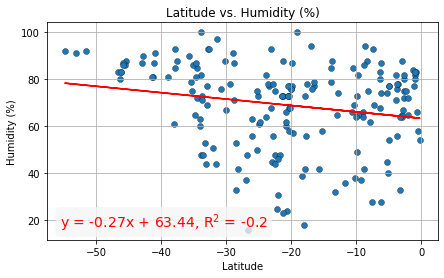

In [37]:
para_1 = "Latitude"
para_2 = 'Humidity (%)'
scatter_regress(df_south, para_1, para_2)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

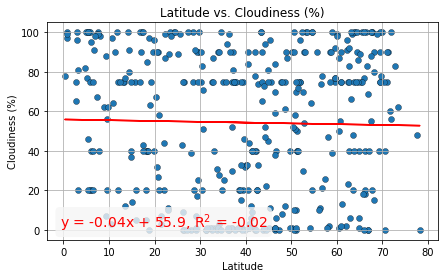

In [38]:
para_1 = "Latitude"
para_2 = 'Cloudiness (%)'
scatter_regress(df_north, para_1, para_2)

# I dont see much correlation in these graphs considering there is little to no Regression.
# There are however, some lines were humidity seems to stay reltivley consistant over Latitude. 
# This could be due to some weather phenominon I am not aware of, or a rounding of the data from the source. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

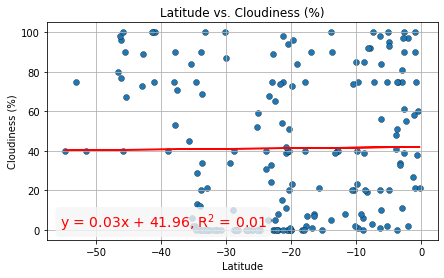

In [39]:
para_1 = "Latitude"
para_2 = 'Cloudiness (%)'
scatter_regress(df_south, para_1, para_2)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

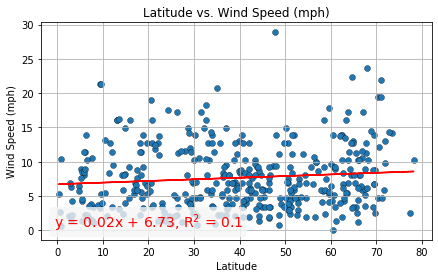

In [40]:
para_1 = "Latitude"
para_2 = 'Wind Speed (mph)'
scatter_regress(df_north, para_1, para_2)
# The wind speed seems to slightly increase as we get further from the equator. 
# This may be due to how wind travels and will vary depending on the season. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

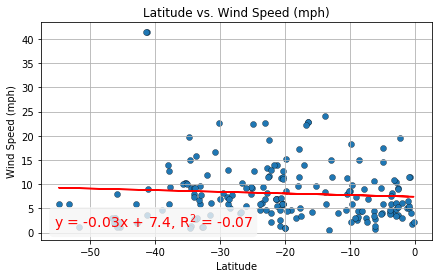

In [41]:
para_1 = "Latitude"
para_2 = 'Wind Speed (mph)'
scatter_regress(df_south, para_1, para_2)